# 计算物理B第四次作业

PB20511896 王金鑫

In [1]:
# !/usr/bin/env python
# -*- coding: utf-8 -*-

# ----------------------------------------------------------------
# @copyright (C), 2022, Bruce Wong, All rights reserved.
# @File Name   : main.py
# @Author      : Bruce Wong
# @Version     : 
# @Date        : 2022-10-22 15:45:11
# @Description : 
# 
# Computational Physics homework 4. Sloving a laplace question by
# finite difference method.
# 
# ----------------------------------------------------------------

### 计算方法
$$
\left\{
\begin{matrix}
\frac{\partial^2\phi}{\partial x^2} + \frac{\partial^2\phi}{\partial y^2} = 0& (x,y)\in[0,\pi]\times[0,\pi]\\
\phi (x=0,y)=\phi(x=\pi,y)=\phi(x,y=0)=0 \\
\phi(x,y=\pi)=\sin x
\end{matrix}
\right.
$$

​	使用有限差分法，原微分方程化为
$$
\phi_{i+1,j}+\phi_{i-1,j}+\phi_{i,j+1}+\phi_{i,j-1}-4\phi_{i,j}=0
$$
​	边界条件向量
$$
\pmb g_j^T=\pmb 0 \quad j\neq {n-1} \\
\pmb g_{n-1}^T=(\sin(h), \sin(2h), \dots, \sin((n-1)h))
$$
​	同时
$$
\pmb b_i^T = \frac{1}{4}\pmb g_j^T
$$
​	这里取 $h=\frac{\pi}{90}, n=90$ ，同时使用 $w=\frac{7}{4}$ 的超松弛迭代求解。

​	原问题精确解为
$$
\phi(x,y)=\frac{\sin x \sinh y}{\sinh \pi}
$$

### 调用第三方库
- `math`: 调用相关数学常数 (例如：`math.pi` $\rightarrow \pi$) 和初等函数。
- `matplotlib.pyplot`: 绘图。
- `time`: 调用当前时间以计算运行时间。

In [2]:
import math
import matplotlib.pyplot as plt
import time


### 精确解函数

In [3]:
# Accurate solution
def AccuratePhi(x, y):
    return (math.sin(x)*math.sinh(y))/math.sinh(math.pi)
    

### 有限差分法
其中使用Gauss-Seidel迭代法求解线性方程组


#### 设置有限差分参数

In [4]:
n = 90 # grid number
w = 7/4
h = math.pi/90


#### 初始化 $\phi (x,y)$ 和 $\pmb bj$
出于便于计算的原因，这里定义的列表为$\phi [y][x]$

In [5]:
# Calculate by Gauss-Seidel iteration
# inite phi(x,y) == phy[y][x]
phi_y_x = [[1 for x in range(n-1)] for y in range(n-1)]
# inite bj
bj = [[0 for x in range(n-1)] for y in range(n-2)]
bj.append([math.sin(x*h)/4 for x in range(1, n)])


#### 将迭代过程打包成函数

In [6]:
def Iteration():
    phi_y_x_copy = phi_y_x[:]
    # y=0
    phi_y_x[0][0] = (phi_y_x[0][1]+phi_y_x[1][0])/4 + bj[0][0] # x=0
    phi_y_x[0][0] = w*phi_y_x[0][0] + (1-w)*phi_y_x_copy[0][0]
    for x in range(1, n-2):
        phi_y_x[0][x] = (phi_y_x[0][x-1]+phi_y_x[0][x+1]+phi_y_x[1][x])/4 + bj[0][x]
        phi_y_x[0][x] = w*phi_y_x[0][x] + (1-w)*phi_y_x_copy[0][x]
    phi_y_x[0][n-2] = (phi_y_x[0][n-3]+phi_y_x[1][n-2])/4 + bj[0][n-2] # x=n-2
    phi_y_x[0][n-2] = w*phi_y_x[0][n-2] + (1-w)*phi_y_x_copy[0][n-2]

    for y in range(1,n-2):
        phi_y_x[y][0] = (phi_y_x[y][1]+phi_y_x[y-1][0]+phi_y_x[y+1][0])/4 + bj[y][0] # x=0
        phi_y_x[y][0] = w*phi_y_x[y][0] + (1-w)*phi_y_x_copy[y][0]
        for x in range(1, n-2):
            phi_y_x[y][x] = (phi_y_x[y][x-1]+phi_y_x[y][x+1]+phi_y_x[y-1][x]+phi_y_x[y+1][x])/4 + bj[y][x]
            phi_y_x[y][x] = w*phi_y_x[y][x] + (1-w)*phi_y_x_copy[y][x]
        phi_y_x[y][n-2] = (phi_y_x[y][n-3]+phi_y_x[y-1][n-2]+phi_y_x[y+1][n-2])/4 + bj[y][n-2] # x=n-2
        phi_y_x[y][n-2] = w*phi_y_x[y][n-2] + (1-w)*phi_y_x_copy[y][n-2]

    # y=n-2
    phi_y_x[n-2][0] = (phi_y_x[n-2][1]+phi_y_x[n-3][0])/4 + bj[n-2][0] # x=0
    phi_y_x[n-2][0] = w*phi_y_x[n-2][0] + (1-w)*phi_y_x_copy[n-2][0]
    for x in range(1, n-2):
        phi_y_x[n-2][x] = (phi_y_x[n-2][x-1]+phi_y_x[n-2][x+1]+phi_y_x[n-3][x])/4 + bj[n-2][x]
        phi_y_x[n-2][x] = w*phi_y_x[n-2][x] + (1-w)*phi_y_x_copy[n-2][x]
    phi_y_x[n-2][n-2] = (phi_y_x[n-2][n-3]+phi_y_x[n-3][n-2])/4 + bj[n-2][n-2] # x=n-2
    phi_y_x[n-2][n-2] = w*phi_y_x[n-2][n-2] + (1-w)*phi_y_x_copy[n-2][n-2]
    

#### 进行迭代
使用alive_bar输出迭代的进度条，同时输出迭代耗时

这里用iters表示迭代次数

In [7]:
StartTime = time.process_time()
from alive_progress import alive_bar
iters = range(10000)
print("Start iteration...")
with alive_bar(len(iters)) as bar:
    for iter in iters:
        Iteration()

        bar()
print("Iteration Over.")
print(f"Process time: {time.process_time()-StartTime}")


Start iteration...
|████████████████████████████████████████| 10000/10000 [100%] in 56.2s (177.89/s) 
Iteration Over.
Process time: 56.015625


### 绘图
分别绘制：迭代所得的 $\phi$ 值，$\phi$ 的精确值，迭代结果与精确解的相对误差

将二维数组压成一维

In [8]:
# plot
Xs, Ys, Zs, Zs_Accu = [], [], [], []
for i in range(n-1):
    Ys += [(i+1)*h]*(n-1)
    Xs += [(i+1)*h]
    Zs += phi_y_x[i]
Xs *= (n-1)
for j in range(n-1):
    for i in range(n-1):
        Zs_Accu.append(AccuratePhi((i+1)*h, (j+1)*h))


绘制迭代结果

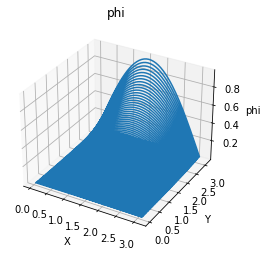

In [9]:

figIter = plt.figure()
axIter = plt.axes(projection='3d')
axIter.set_xlabel("X")
axIter.set_ylabel("Y")
axIter.set_zlabel("phi")
axIter.set_title('phi')
axIter.plot(Xs, Ys, Zs)


绘制精确解

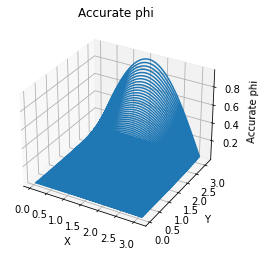

In [10]:
figAccu = plt.figure()
axAccu = plt.axes(projection='3d')
axAccu.set_xlabel("X")
axAccu.set_ylabel("Y")
axAccu.set_zlabel("Accurate phi")
axAccu.set_title('Accurate phi')
axAccu.plot(Xs, Ys, Zs_Accu)


绘制相对误差

横轴为x，纵轴为y

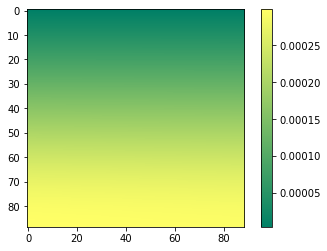

In [11]:
figRelaError = plt.figure()
RelaError = [[] for i in range(n-1)]
for j in range(n-1):
    for i in range(n-1):
        RelaError[j].append(abs(phi_y_x[j][i]/Zs_Accu[(n-1)*j+i]-1))
RelaError.reverse()
plt.imshow(RelaError, cmap='summer')
plt.colorbar()


展示图片

In [12]:
plt.show()